# Homework 1

## Ex. 4.1
3. For $n=100k$, with $k=1,\dots,5$, estimate the running time of `MATLAB` for computing the product of the product of two matrices `A = rand(n,n)` and `B = rand(n,n)`. Plot this runing time in terms of $n$.

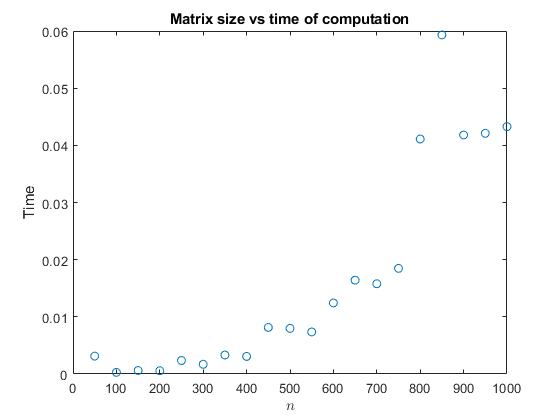

In [4]:
kmax = 20;
M = 50;

time = zeros(1,kmax);

for k=1:kmax
    n = M*k;
    a = rand(n,n);
    b = rand(n,n);
    tic;
    a*b;
    time(k) = toc;
end

figure
plot(M:M:M*kmax,time,'o')
title('Matrix size vs time of computation')
xlabel('$n$','interpreter','latex')
ylabel('Time')

4. Assume that this running time is a polynomial function of $n$, so that for $n$ large enough, $T(n) \approx Cn^s$. In orther to find a numerical approximarion of the exponent $s$, plot the logarithm of $T$ in terms of the logarithm of $n$. Deduce an approximate value of $s$.

    2.3994

  -19.6621




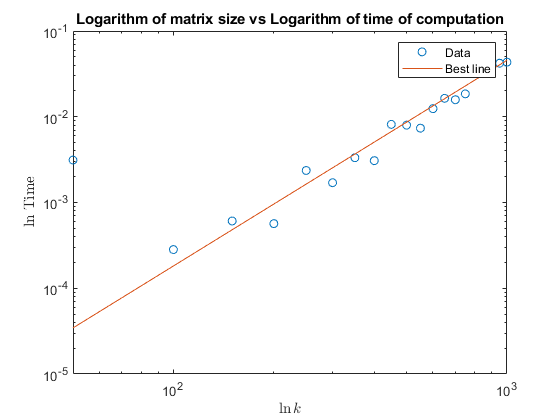

In [5]:
% Fit the best straight line
p = polyfit(log(2*M:M:M*kmax),log(time(2:kmax)),1);

figure
loglog(M:M:M*kmax,time,'o')
hold on
loglog(M:M:M*kmax,exp(p(2)+p(1).*log(M:M:M*kmax)))
hold off
title('Logarithm of matrix size vs Logarithm of time of computation')
xlabel('$\ln k$','interpreter','latex')
ylabel('$\ln$ Time','interpreter','latex')
legend('Data','Best line')

disp(p(1))
disp(p(2))

## Ex. 4.2
In order to compute the product $ C = AB $ of two real square matrices $A$ and $B$, we use the usual algorithm $$ c_{i,j}=\sum_{k=1}^n a_{i,k}b_{k,j}, \ \ 1\leq i,j\leq n,$$ with the usual notation.
1. Prove that if $A$ is lower triangular, then the computational complexity for the product $C=AB$ is equivalent to $n^3/2$ for $n$ large (recall that only multiplications an divisions are counted).

> If $A$ is lower triangular, then $a_{i,j} = 0$ whenever $i<j$. Thus $$ c_{i,j}=\sum_{k=1}^i a_{i,k}b_{k,j}, \ \ 1\leq i,j\leq n.$$ For each pair $(i,j)$, we requere $i$ multiplications for computing $c_{i,j}$.  Then, the number of operations is given by $$ N_\mathrm{op} = \sum_{i=1}^n \sum_{j=1}^n i = \dfrac{n^2(n+1)}{2} = \dfrac{n^3}{2} + O(n^2).$$

2. Write, in pseudolanguage, an algorithm that makes it possible to compute the product $C = AB$ of a lower triangular matrix $A$ with any matrix $B$ that has the computational complexity $n^3/2$.

```OCTAVE
function C = LowTriRegMat(A,B)
C = zeros(size(A,1),size(B,2));
for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:i
            C(i,j) = C(i,j) + A(i,k)*B(k,j);
        end
    end
end
return C
```

3. We assume henceforth that both matrices $A$ and $B$ are lower triangular. Taking into account their special structure, prove that the computational complexity for the product $C = AB$ is equivalent to $n^3/6$.

> Now if $A$ and $B$ are lower triangular, then $a_{i,k} = 0$ whenever $i<k$ and $b_{k,j} = 0$ whenever $k<j$. Thus $$ c_{i,j}=\sum_{k=j}^i a_{i,k}b_{k,j}, \ \ 1\leq j\leq i \leq n.$$ For each pair $(i,j)$ such that $1\leq j\leq i \leq n$, we requere $i-j$ multiplications for computing $c_{i,j}$, and $0$ if $(i,j)$ is such that $j> i$. This reduces the number of operations.  In fact, the number of operations is given by $$ N_\mathrm{op} = \sum_{i=1}^n \sum_{j=1}^i i -j = \sum_{i=1}^n i^2 - \dfrac{i(i+1)}{2} = \dfrac{1}{2} \sum_{i=1}^n i^2 - i = \dfrac{1}{2}\dfrac{n(n+1)(2n+1)}{6} + O(n^2) =\dfrac{n^3}{6} + O(n^2).$$


4. Write a function `LowTriMatMult` that performs the product of two lower triangular matrices, exploiting the sparse structure of these matrices. Compare the results obtained with those of `MATLAB`.

In [7]:
%%file LowTriMatMult.m

function [C] = LowTriMatMult(A,B)

if (size(A)~=size(B))
    disp('Unable to compute A*B: matrix sizes must be equal')
else
    C = zeros(size(A));
    for i=1:size(A,1)
        for j=1:i
            for k=j:i
                C(i,j) = C(i,j) + A(i,k)*B(k,j);
            end
        end
    end
end

end

Created file 'D:\GitHub\NLA-IMA\hw1\LowTriMatMult.m'.


5. Write a function `MatMult` that executes the product of two matrices (without any special structure). Compare the computational time of this function with that of `LowTriMatMult` for computing the product of two lower triangular matrices.

In [8]:
%%file MatMult.m

function [C]=MatMult(A,B)

if (size(A)~=size(B))
    disp('Unable to compute A*B: matrix size must be equal')
else
    C = zeros(size(A));
    for i=1:size(A,1)
        for j=1:size(A,2)
            for k=1:size(A,1)
                C(i,j) = C(i,j) + A(i,k)*B(k,j);
            end
        end
    end
end

end

Created file 'D:\GitHub\NLA-IMA\hw1\MatMult.m'.


In [9]:
N = 1000;
a = tril(rand(N,N));
b = tril(rand(N,N));

tic
a*b;
toc

tic
MatMult(a,b);
toc

tic
LowTriMatMult(a,b);
toc

Elapsed time is 0.064794 seconds.
Elapsed time is 9.008342 seconds.
Elapsed time is 2.102397 seconds.



6. Fix $n = 300$. Define `a = triu(rand(n,n))` and `b = triu(rand(n,n))`. Find the running time $t_1$ for computing the product `a*b`. In order to exploit the sparse structure of the matrices, we define `sa=sparse(a)`, `sb=sparse(b)`. Find the running time $t_2$ for the command `sa*sb`. Compare $t_1$ and $t_2$.

In [6]:
n = 1000;

a = triu(rand(n,n));
b = triu(rand(n,n));
sa = sparse(a);
sb = sparse(b);
sc = sparse(zeros(n,n));

tic
a*b;
toc

tic
sc = sa*sb;
toc

Elapsed time is 0.053153 seconds.
Elapsed time is 0.746229 seconds.

